# ch 1. simple linear regression

선형 회귀(linear regression)는 종속 변수 y와 한개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀 분석 기법입니다. 종속 변수 하나와 독립 변수 하나 사이의 관계를 규명할 경우엔 단순 선형 회귀, 여러 독립 변수와 종속 변수 사이의 관계를 규명하면 다중 선형 회귀라고 합니다. 이번 챕터에서는 단순 선형 회귀의 (rquare) 개념과 실습을 진행해보겠습니다.

In [43]:
# 회귀 : 어디론가 돌아간다
# 선형 : 하나의 직선 : 최소 기울기와 절편
# 아래 그래프 : 단순 선형 회귀 : 하나의 선으로 데이터의 관계를 표현하는 -> 직관적으로 모델링 가능, 현업에서도 자주 사용

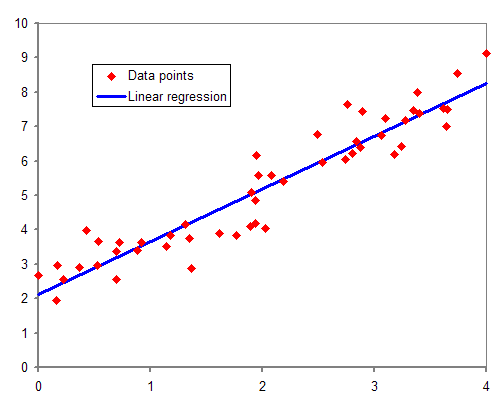

## 단순 선형 회귀

단순 선형 회귀는 하나의 독립 변수가 종속 변수에 직선의 방정식으로 표현될 수 있는 모형으로 수식은 아래와 같습니다.

$$Y=\beta_{0}+\beta_{1}X+\epsilon$$

$$X:\text{독립 변수}$$
$$Y:\text{종속 변수}$$
$$\beta_{0}:\text{절편}$$
$$\beta_{1}:\text{기울기}$$
$$\epsilon:\text{오차}$$

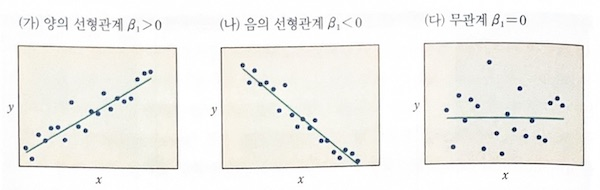

기울기가 양수이면 독립 변수와 종속 변수가 양의 상관관계를 갖고, 음수면 음의 상관관계를 갖습니다. 0이면 독립 변수와 종속 변수 사이 관계가 없습니다.

In [4]:
## 사용하는 상황, 핵신적인 개념, 결과 해석하는 법만 이해하고 있으면 됨

In [3]:
# ols 기법으로 최소 제곱법 계산할 거임
# b1, b2 argument의 최소화하는 값을 찾겠다,  오차의 제곱이 최소화가 되도록 회귀식 유도하기

## 최소 제곱법

우리가 하고 싶은 것은 데이터로부터 회귀 식을 추정하는 것입니다. 추정된 회귀 식은 아래와 같습니다.

$$\hat{y}=b_{0}+b_{1}x$$

오차의 제곱이 최소가 되는 값을 찾으면 β0, β1에 대한 가장 그럴듯한 추정값을 구할 수 있지 않을까요? 이를 식으로 나타내면 아래와 같습니다. (b0와 b1을 각각 β0, β1의 추정값입니다.)

$$(b_{0},b_{1})=argmin\sum_{i=1}^{n}\epsilon_{i}^2=argmin\sum_{i=1}^{n}(y_{i}-\beta_{0}-\beta_{1}x_{i})^2$$

오차의 제곱을 최소로 만드는 기법이라고 하여 최소 제곱법이라고 부릅니다. 최소 제곱법을 이용하여 유도한 추정 값들은 아래와 같습니다. 

유도 과정이 궁금하신 분들은 아래 링크를 참고해주세요.  
https://evening-ds.tistory.com/36

$$b_{1}=\frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^2}=r_{xy}\frac{S_{y}}{S_{x}}$$

$$b_{0}=\bar{y}-b_{1}\bar{x}$$

## 집 값 예측하기 예제

데이터 셋 링크: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

In [5]:
from utils import load_house_dataset

x_train, x_test, y_train, y_test = load_house_dataset()

In [8]:
x_train
# 독립변수 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,yr_sold_built
21048,3,3.25,1470,1235,2.0,0,0,3,7,1180,290,1470,1243,6
15508,2,2.25,2130,5920,1.0,0,0,3,8,1830,300,2130,7192,64
3376,4,4.50,3890,5906,2.0,0,3,3,11,3060,830,4170,6052,10
20978,4,2.50,3170,8523,2.0,0,0,3,9,3170,0,3230,8523,6
10904,2,1.00,1120,7440,1.0,0,0,4,7,1120,0,1170,7440,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,3,2.50,1920,12244,2.0,0,0,3,7,1920,0,1920,11859,16
9449,4,3.00,3150,9130,2.0,0,0,3,9,3150,0,2970,6228,13
8471,3,2.75,2340,16500,1.0,0,0,4,8,1500,840,2210,15251,42
17048,2,2.50,1160,2174,2.0,0,0,3,7,1160,0,1380,1919,16


In [7]:
y_train
# 예측하고자 하는 종속변수인 집값

21048    300000.0
15508    779000.0
3376     970000.0
20978    820000.0
10904    335900.0
           ...   
8222     380600.0
9449     695000.0
8471     563000.0
17048    168000.0
1318     234975.0
Name: price, Length: 17280, dtype: float64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


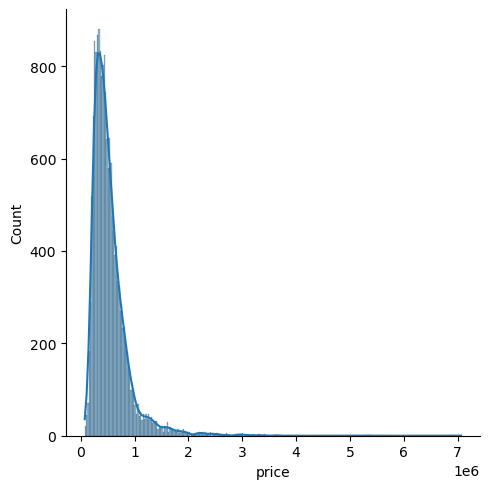

In [9]:
# 종속 변수의 분포도 확인해서 독립변수 고르기기
import seaborn as sns

sns.displot(
    y_train,
    kde = True
)

In [10]:
# 비싼 집은 롱테일 형태, 값이 싼 집은 높고 좁게 형태를 띄고 있음 -> 로그를 취해볼 수도 있겠구나라고 해석할 수 있음

### 독립 변수 선택

price와 피어슨 상관계수가 가장 높은 변수 하나를 독립 변수로 선택하겠습니다.

In [11]:
x_train["price"] = y_train

In [15]:
x_train.corr()["price"].sort_values(ascending=True)
# 피어슨 상관계수 확인 ( -1 ~ 1 로 표현 -> 1 이나 -1인 애들이 집값과 관련이 있는 것)

yr_sold_built   -0.050860
condition        0.040375
sqft_lot15       0.077779
sqft_lot         0.083050
floors           0.254444
waterfront       0.271943
bedrooms         0.307198
sqft_basement    0.313905
view             0.394313
bathrooms        0.515348
sqft_living15    0.583371
sqft_above       0.603003
grade            0.664325
sqft_living      0.699863
price            1.000000
Name: price, dtype: float64

### statsmodels (파이썬 통계학 라이브러리)를 이용한 선형 회귀 모델 학습

선형 상관관계가 가장 큰 변수들 중 sqft_living을 선택하여 선형 회귀 모델을 학습시켜 보겠습니다. 먼저 scatter plot 부터 그려보겠습니다.

In [16]:
x_train = x_train["sqft_living"]
x_test = x_test["sqft_living"]

Text(0, 0.5, 'price')

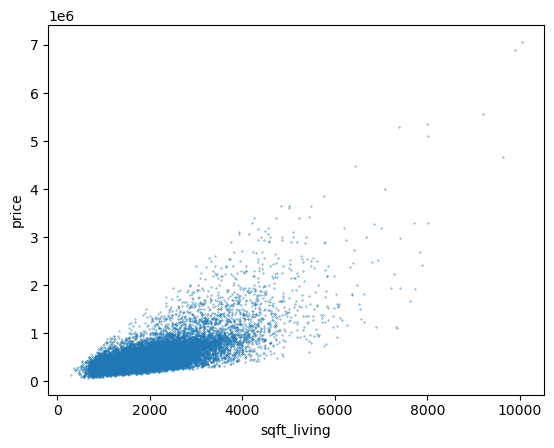

In [28]:
from matplotlib import pyplot as plt

plt.scatter(x_train, y_train, s=0.1)
plt.xlabel("sqft_living")
plt.ylabel("price")

In [22]:
# 시각자료와 함께 관계 확인하는 습관 굿!! 
# 양의 선형 관계를 가지고 있다는 것울 알 수 있음

python statsmodels 이용하여 단순 선형 회귀 모델을 도출해보겠습니다.  statsmodels를 이용하여 선형회귀 모델을 학습시킬 경우, 상수항을 추가해주어야 합니다.  

In [23]:
import statsmodels.api as sm

x_constant_train = sm.add_constant(x_train, has_constant="add")

In [25]:
x_constant_train
# const 상수항 추가해주기!!

,const,sqft_living
21048,1.0,1470
15508,1.0,2130
3376,1.0,3890
20978,1.0,3170
10904,1.0,1120
...,...,...
8222,1.0,1920
9449,1.0,3150
8471,1.0,2340
17048,1.0,1160


이제 최소 제곱법의 구현체 중 하나인 OLS를 이용해서 선형회귀 모델을 학습시켜 보겠습니다. OLS에 대한 자세한 내용이 궁금하신 분들은 아래 강의를 참고해주세요.

https://www.youtube.com/watch?v=eTTGN4FAPxk

In [29]:
# ordinary list square (오차의 제곱을 최소화하는 기법 중 하나)
model = sm.OLS(y_train, x_constant_train)
results = model.fit()

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                 1.659e+04
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        10:49:45   Log-Likelihood:            -2.3990e+05
No. Observations:               17280   AIC:                         4.798e+05
Df Residuals:                   17278   BIC:                         4.798e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.142e+04   4920.466     -8.418      0.000   -5.11e+04   -3.18e+04
sqft_living   279.9269      2.173    128.793      0.000     275.667     284.187
==============================================================================
Omnibus:                    11627.704   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           395396.345
Skew:                           2.766   Prob(JB):                         0.00
Kurtosis:                      25.772   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# const,sqft_living X coef = 선형회귀 값
# pvalue 값도 나옴 

학습한 회귀식을 시각화 해보겠습니다.

In [41]:
results.params
# sqft하나당 저 값만큼 price 높아지는 것

const         -41421.994412
sqft_living      279.926905
dtype: float64

In [34]:
b, w = results.params
# w 가울가, b 절편

In [35]:
y_train_pred = results.predict(x_constant_train)

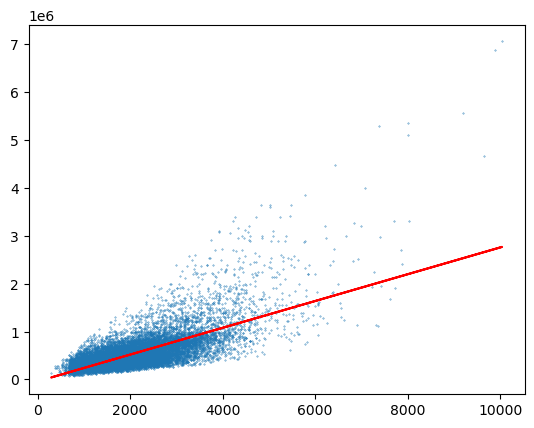

In [36]:
plt.scatter(x_train, y_train, s=0.1)
plt.plot(x_train, y_train_pred, color ="red")

### 테스트 데이터 셋에 대해 적용

train set으로 회귀 식을 도출했으니, 이제 test set에 적용해보겠습니다. 그리고 회귀 식이 얼마나 잘 test set을 설명하는지 정량적인 지표를 측정해보겠습니다.

In [40]:
# 미래를 예측하기 위해 회귀식 도출하는 것 
# y값을 모르는 데이터가 들어왔을 때를 위해서 -> test셋에도 적용시켜보기

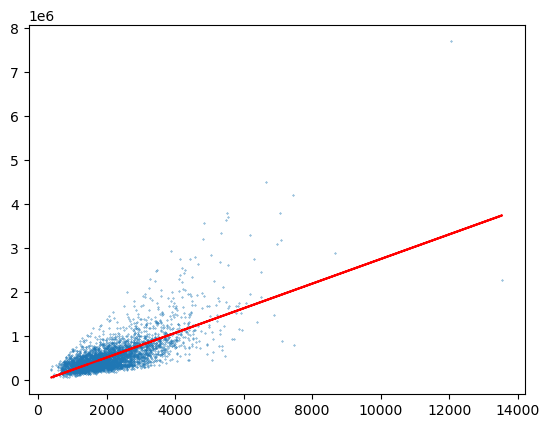

In [39]:
x_constant_test = sm.add_constant(x_test)
y_test_pred = results.predict(x_constant_test)
plt.scatter(x_test, y_test, s=0.1)
plt.plot(x_test, y_test_pred, color ="red")

In [ ]:
# train셋을 통해 도출한 회귀식이 test셋에서도 데이터를 설명하는 데에 있어서 적용이 잘 되는 것을 알 수 있음 

### 결과 해석

위에서 R2, RMSE 두 가지 척도로 회귀식의 적합도를 측정하였습니다. 이는 각각 데이터의 전체 변동에서 회귀식이 설명하는 비중, 회귀식의 오차항의 제곱합의 제곱근을 의미하며, 자세한 내용은 이어지는 챕터들에서 배울 예정입니다. 이 외에도 statsmodels는 회귀식이 데이터를 얼마나 잘 설명하는 지 측정하는 여러가지 지표들을 제공해줍니다.

In [42]:
# 면접 단골 질문

굉장히 많은 숫자가 겁을 주지만 전혀 걱정할 필요 없습니다. 이어지는 챕터들에서 모두 다룰 내용들입니다. 지금은 그냥 회귀식이 얼마나 적합한지 측정하는 지표가 많이 있다 정도로 알고 넘어가겠습니다.

## 선형 회귀 모형의 가정사항

선형 회귀 모델은 전제하는 가정사항들이 있습니다. 먼저 하나의 관측값은 회귀식을 통해 추정한 값과 오차의 합으로 계산할 수 있습니다.

$$Y_{i}=\beta_{0}+\beta_{1}X_{i}+\epsilon_{i}$$

여기서 오차항은 회귀식을 통해 추청한 값과 실제 값 사이의 차이를 의미합니다. 이 오차항에 대해서 몇 가지 가정을 전제하고 모델을 구성한 것이 선형 회귀 모델입니다.

$$ \text{1. 오차항(}\epsilon_{i}\text{)의 평균은 0이고 분산은 }\sigma^2 \text{이다. (등분산성)}$$ 분산이 똑같은 것이다

$$\text{2. 오차항(}\epsilon_{i}\text{들은 서로 독립이다. (독립성)}$$

$$\text{3. 오차항}\epsilon_{i}\text{은 정규분포를 따른다. (정규성)}$$

위 세 가지 가정을 모두 합쳐서 수식으로 표기하면 아래와 같습니다.

$$\epsilon_{i} \sim iid\;N(0, \sigma^2)$$

해석해보면, 각각의 오차항들은 서로 독립적인 정규 분포를 따른다고 가정하는 것입니다. 이를 그림으로 그려보면 아래와 같습니다.

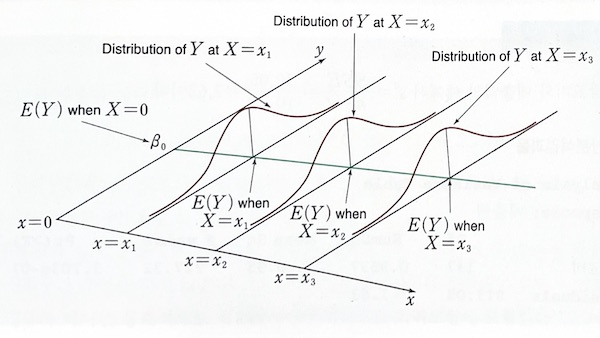

In [44]:
# 기울기가 베타 1, 절편이 베타 0인 우리가 구한 회귀식 (초록선)
# 1,2,3 오차항 가정 -> 오차항들은 분산 똑같고 정규분포를 따르고 독립이다. 
# 데이터가 선형회귀 근처에 몰려있을 것이다 라고 이해하면 됨
# summary에서 마지막 표

선형 회귀식을 구하는 방법으로 최소 제곱법 이외에도 많은 방법들이 존재합니다. 그런데 이런 방법들은 위 가정 사항들을 전제하고 회귀식을 구한 것입니다. 따라서 도출된 회귀식이 적합한지 검정하기 위해서는 가정 사항들이 만족되는 지를 점검해야합니다.

예제 마지막에서 살펴본 지표들에는 이런 가정이 얼마나 만족되었는 지를 측정한 결과도 있습니다. 회귀 분석을 할 경우, 단순히 모델이 얼마나 잘 예측하는 지 보다 도출된 회귀식이 얼마나 데이터를 잘 설명하는 지를 해석하는 부분이 더 중요합니다. (예측력만 놓고 따지면 다른 기법들이 훨씬 우수합니다. ex. decision tree, deep learning) 

## 정리

이번 챕터에서는 독립 변수가 1개, 종속 변수가 1개일 때 적용할 수 있는 단순 선형 회귀에 대해서 알아보았습니다. statsmodels 라이브러리를 사용해서 선형 회귀 모델을 직접 학습시켜 보았고, 결과 요약 리포트를 뽑아보았습니다. 마지막으로 선형 회귀 모델의 가정 사항에 대해서 알아보았습니다. 특히 가정 사항을 잘 이해하는 것이 이어지는 챕터들을 따라올 때 유용하므로 복습을 잘 해두시기 바랍니다.